### Simulate Debye Rings of Si 

### TOC

1. [Create the Debye ring image of Si](#1)
2. [Resize image to match with an experimentally generated image and save four copies differentiated by distinct labels, C1, C2, C3, and C4](#2)
3. [Convert the saved image to 16-bit using imagej](#3)

#### 1. Create the Debye ring image of Si<a id="1"></a>

*Parameters:*
- wavelength = 3.41554265656199e-11m 
- detector distance = 0.13162635726113767m
- detector per pixel size = 43.48e-6m/px x 43.48e-6m/px 
- image pixel size = 2048px x 2048px

*Packages:* 
- pyfai
- matplotlib

NOTE: Also refer to the README.md file within the integrate_debye_rings project on how to prepare for the conda environment called pyFAI_python39

ref: https://pyfai.readthedocs.io/en/v2023.1/usage/tutorial/Geometry/geometry.html?highlight=max_shape#Translation-orthogonal-to-the-beam:-poni1-and-poni2

Using pyFAI version 2023.3.0
-----
Detector Detector	 Spline= None	 PixelSize= 4.348e-05, 4.348e-05 m
Wavelength= 3.415543e-11 m
SampleDetDist= 1.316264e-01 m	PONI= 4.411428e-02, 4.172673e-02 m	rot1=-0.009312  rot2=-0.005580  rot3=0.000000 rad
DirectBeamDist= 131.634 mm	Center: x=987.868, y=997.695 pix	Tilt= 0.622° tiltPlanRotation= -30.931° 𝛌= 0.342Å


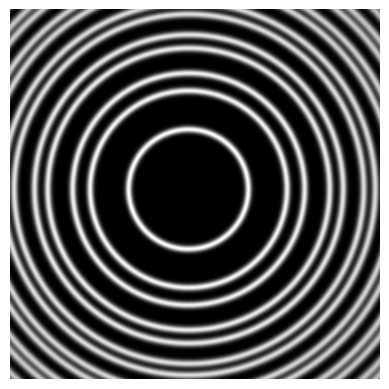

In [1]:
# %matplotlib widget
#For documentation purpose, `inline` is used to enforce the storage of images into the notebook
%matplotlib inline


import pyFAI
print("Using pyFAI version", pyFAI.version)

from pyFAI.calibrant import get_calibrant
from pyFAI.azimuthalIntegrator import AzimuthalIntegrator

import matplotlib.pyplot as plt

#set parameters
wl = 3.41554265656199e-11 
cal = get_calibrant("Si")
cal.wavelength=wl

pixel1=43.48e-6
pixel2=43.48e-6
detector = pyFAI.detectors.Detector(pixel1, pixel2)
detector.max_shape=(2048,2048)
distance=0.13162635726113767

ai = AzimuthalIntegrator(dist=distance, detector=detector, wavelength=wl)

ai.poni1=0.04411428036828969
ai.poni2=0.04172673442946006
ai.rot1=-0.00931213914094191
ai.rot2=-0.005579827855152664
ai.rot3=1.7024448330784618e-09

#check
print("-----")
print(ai)

#generate image and view
data = cal.fake_calibration_image(ai) #need to change to 16 bit
plt.imshow(data, cmap='gray')

plt.axis('off')
plt.show()

#### 2. Resize image to match with an experimentally generated image and save four copies differentiated by distinct labels, C1, C2, C3, and C4 <a id="2"></a>

Done!


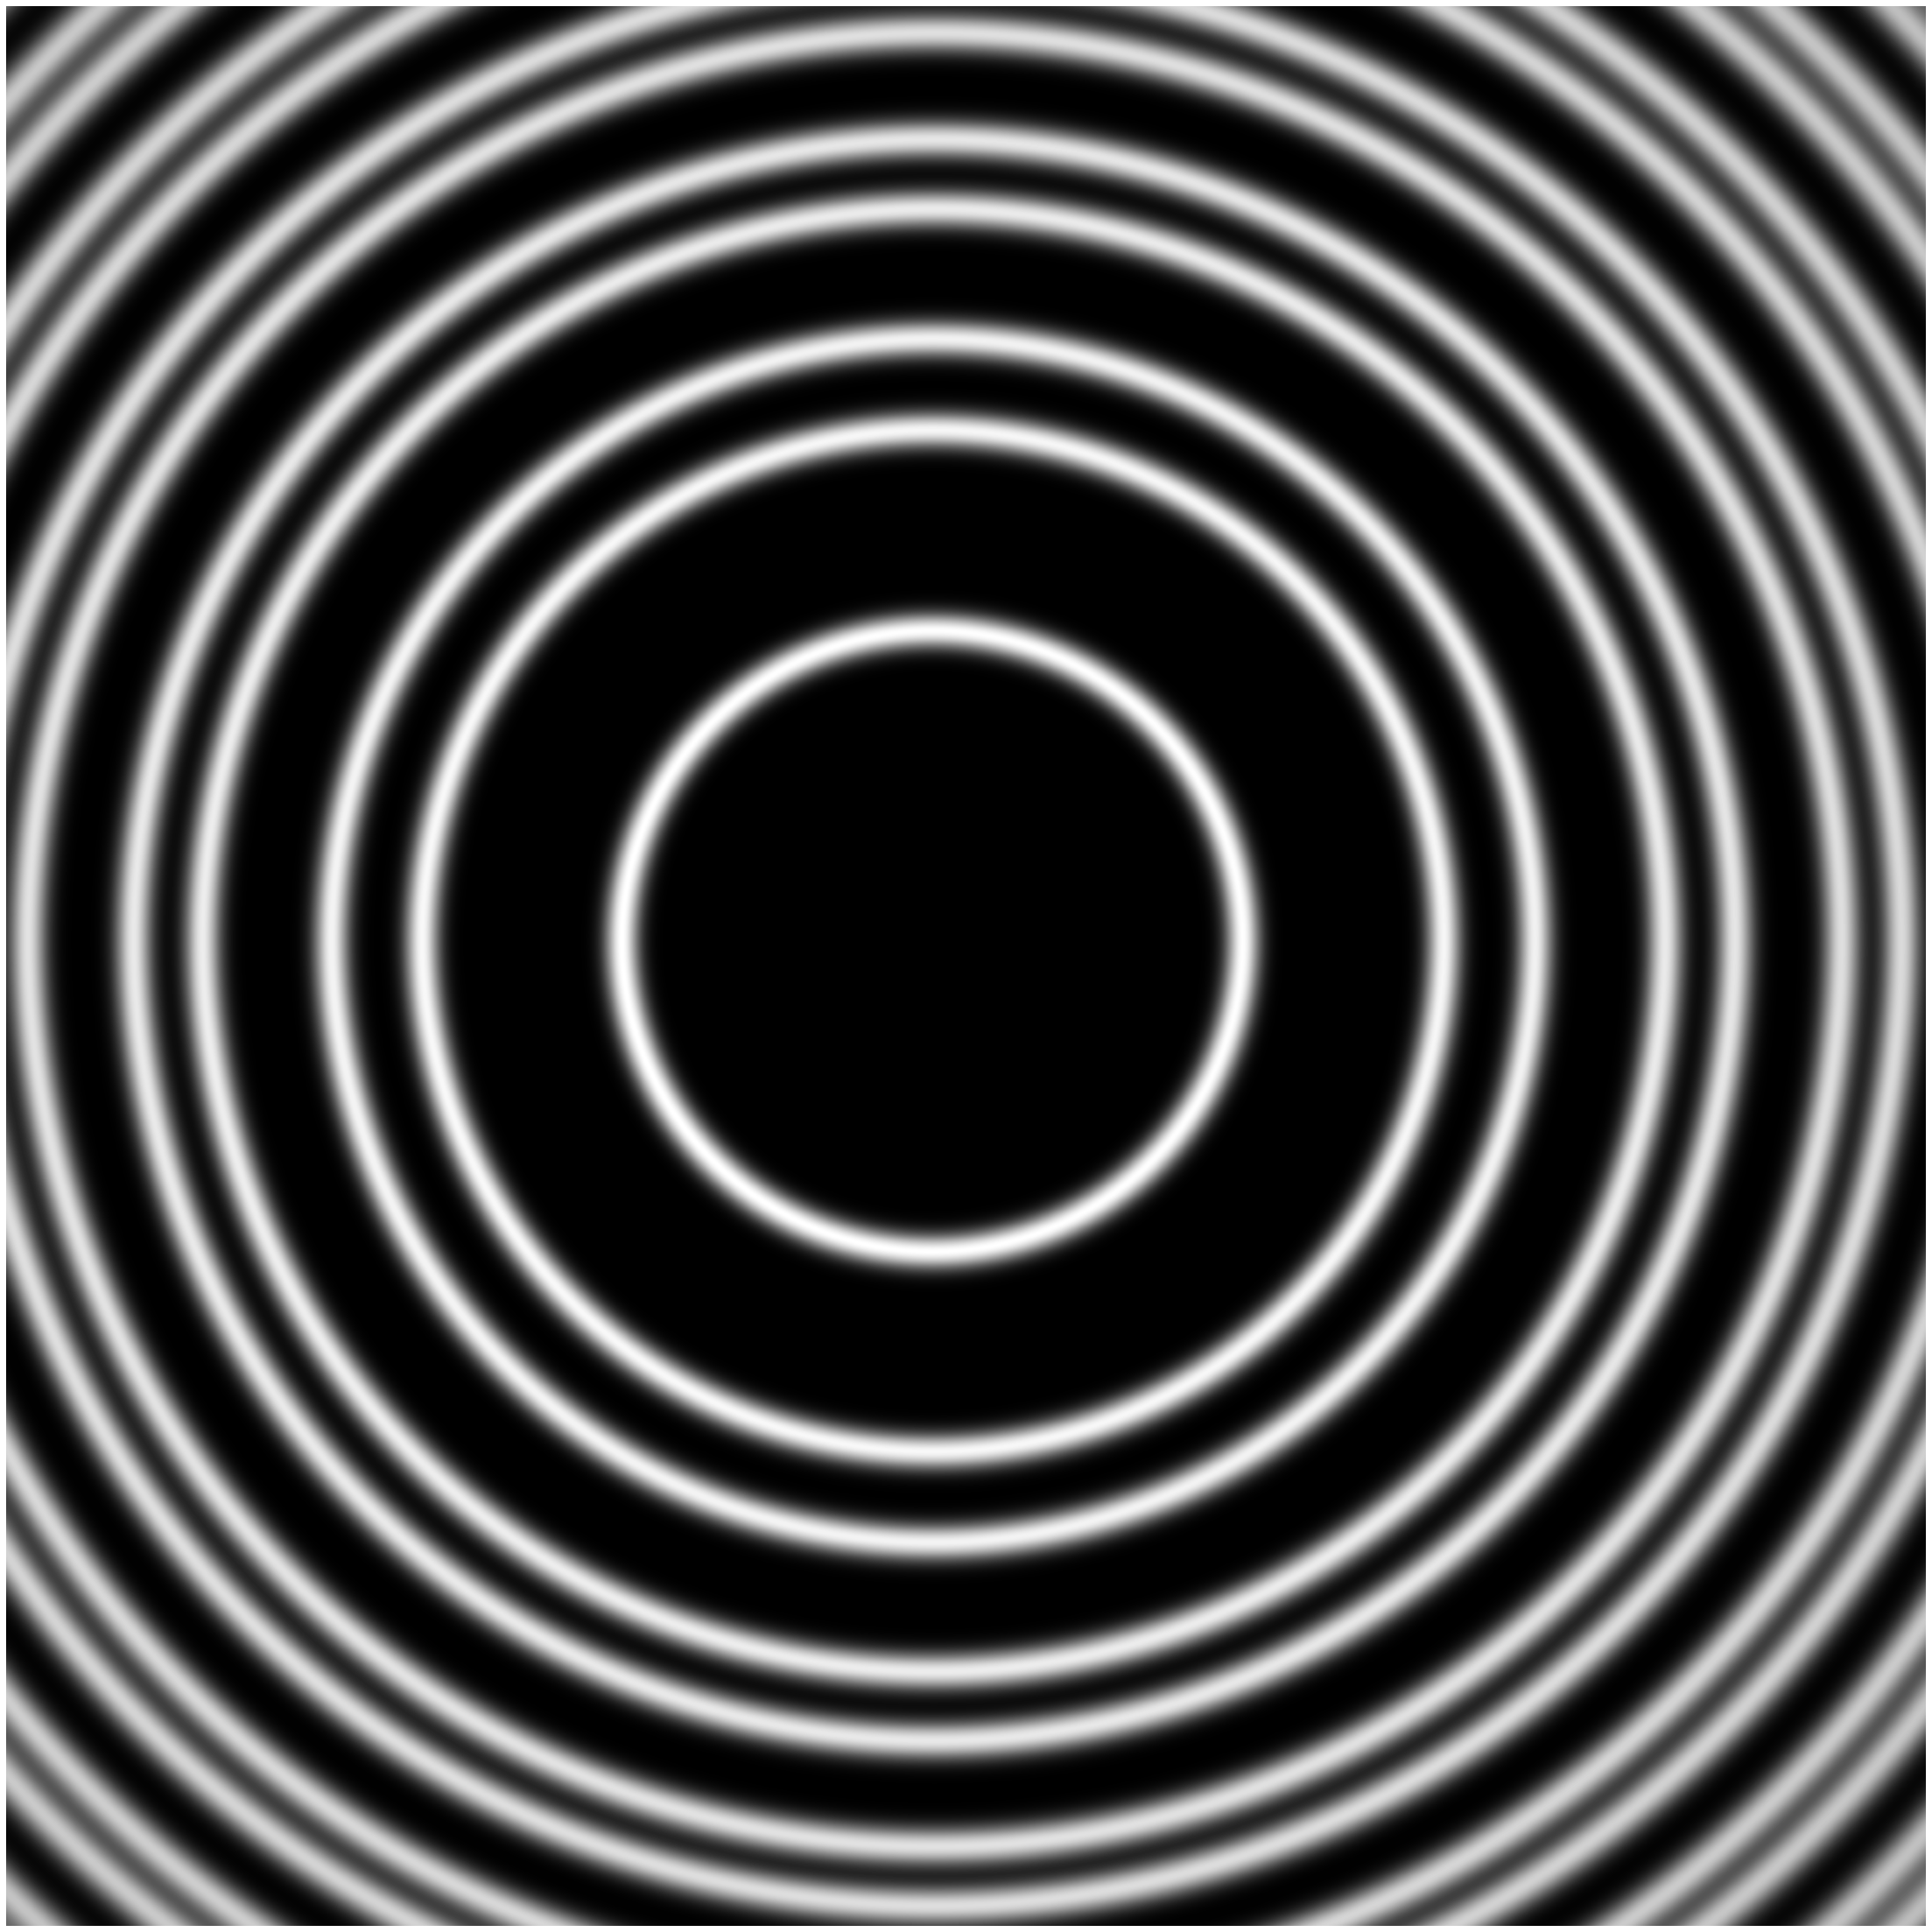

In [2]:
w_inch=h_inch=2048/72 #px/dpi=28.44inch

plt.figure(dpi=72, figsize=(w_inch*1.3905, h_inch*1.3905))
plt.imshow(data, cmap='gray')
plt.axis('off')

#save data
for i in range(1,5):
    plt.savefig("Si_Faux_C%s.tif" %(i), bbox_inches='tight', pad_inches = -1, format="tif", dpi=72)
    
print("Done!")

#should convert these images to 16 bit using imagej

#### 3. Convert the saved image to 16-bit using imagej<a id="3"></a>
ref: https://imagej.nih.gov/ij/download.html


*Procedure:*
- Go to Image -> Type -> select 16-bit
- Next, go to File -> Save As -> Tiff... 

***